<a href="https://colab.research.google.com/github/youyinnn/s2search/blob/pipelining/s2search_score_ploting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [6]:
%load_ext autoreload
%autoreload 2
import sys, os
import numpy as np
import matplotlib.pyplot as plt

in_colab = 'google.colab' in sys.modules

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Fetching npy files from github(if you are using colab)

With git cmd

In [3]:
if in_colab:
    !rm -rf s2search
    !git clone --branch pipelining https://github.com/youyinnn/s2search.git
    sys.path.insert(1, './s2search')

### Pick an experiment

In [15]:
from feature_masking import masking_options
from pick_exp_and_sample import ask

exp_name, exp_dir, description, sample_and_data = ask(in_colab)

Got experiments: ['exp1', 'exp3', 'exp4', 'exp2']
Experiment exp4's description:  
Experiment No.4, Plot all data
Got sample data: ['cslg.data', 'cscv.data', 'csai.data', 'csms.data']


### Ploting the data

#### Only positive score

Experiment exp4's description:  
Experiment No.4, Plot all data


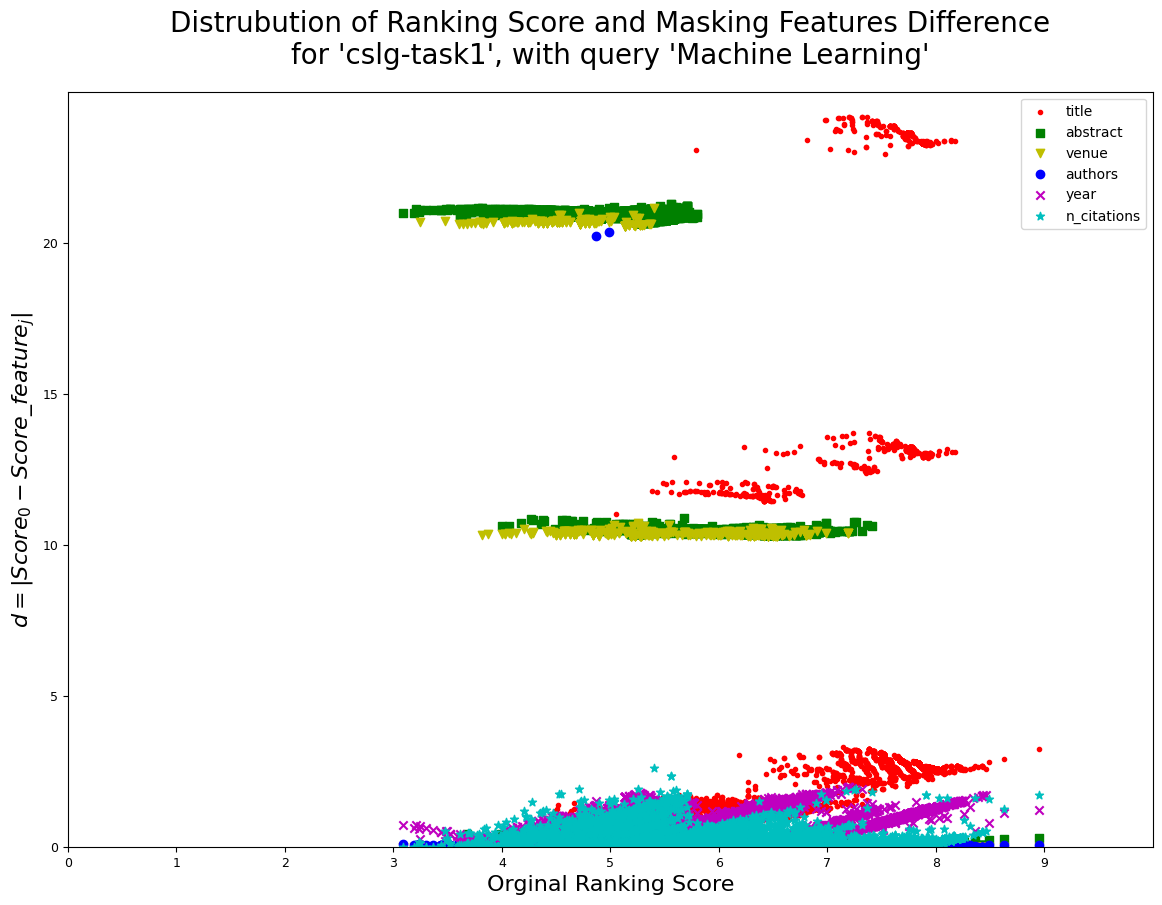

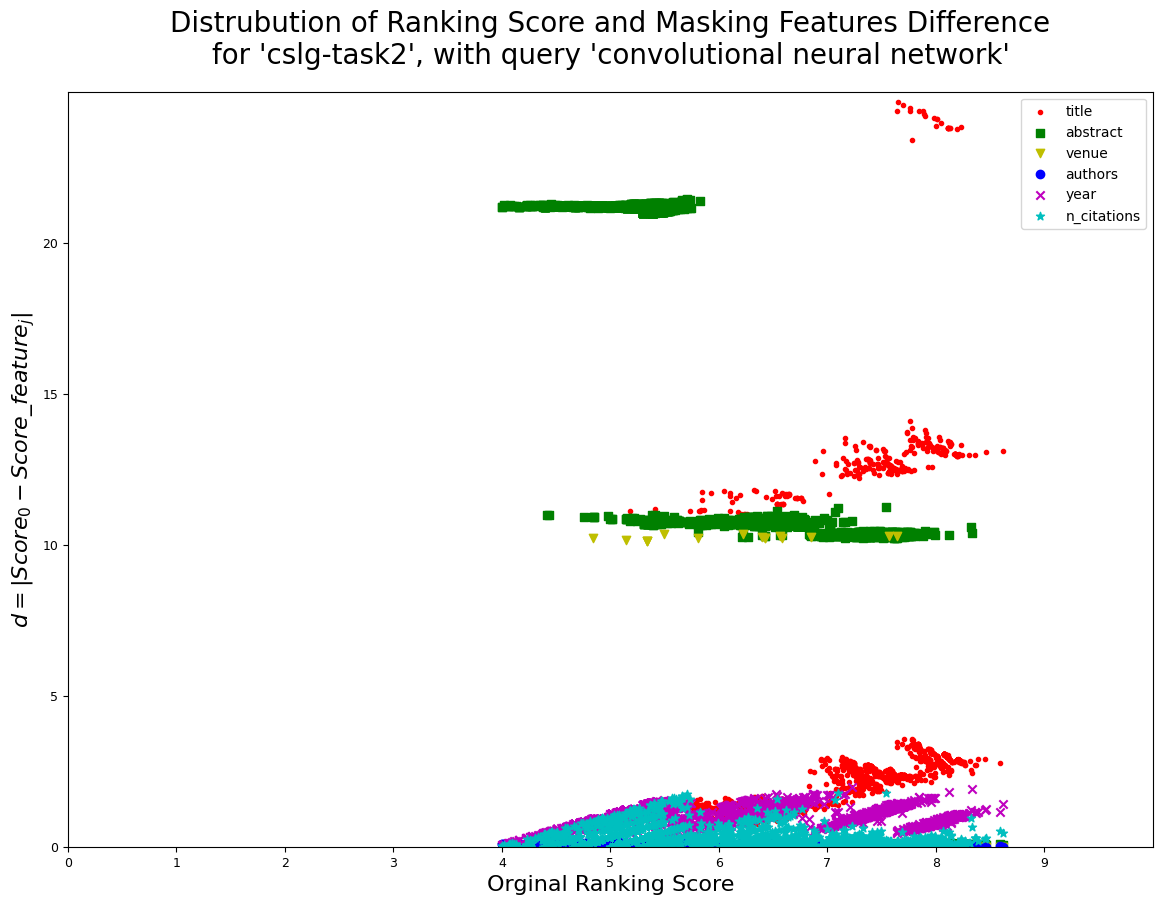

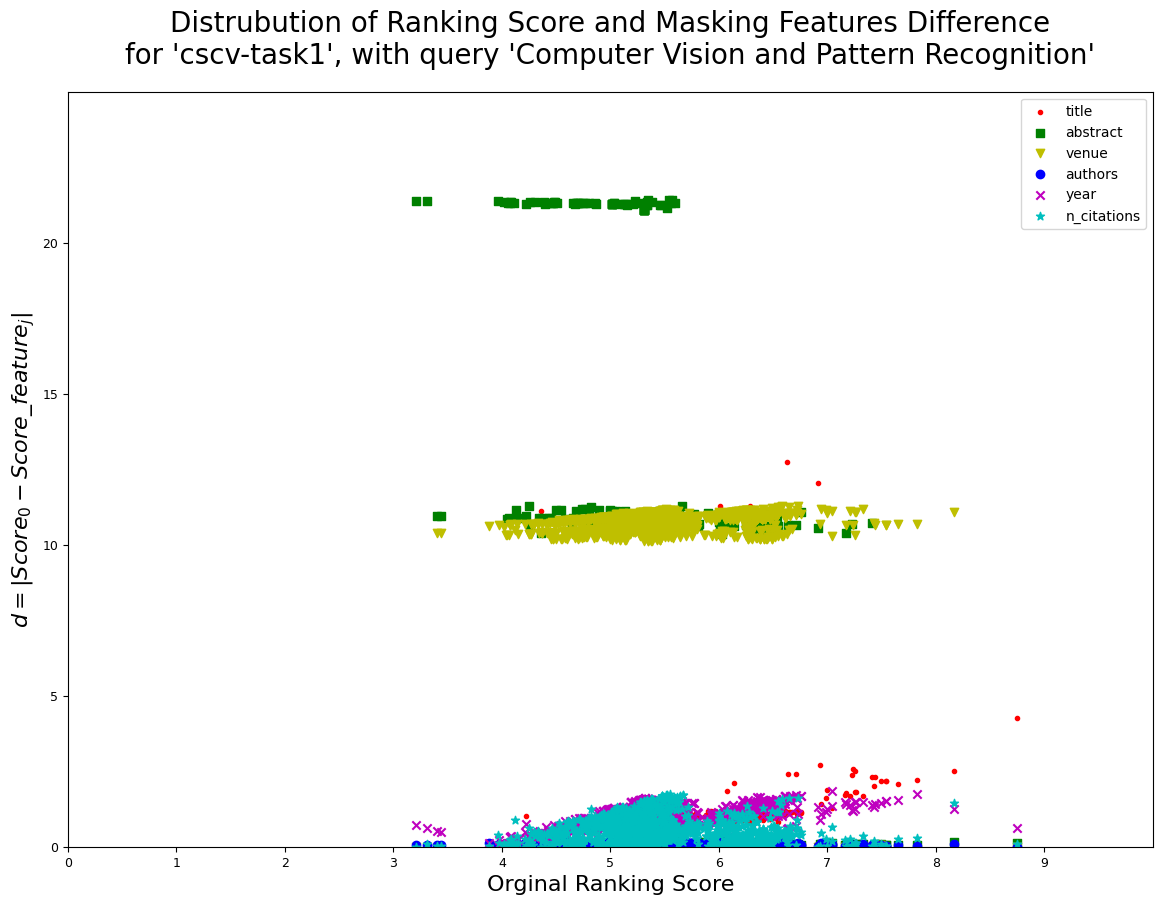

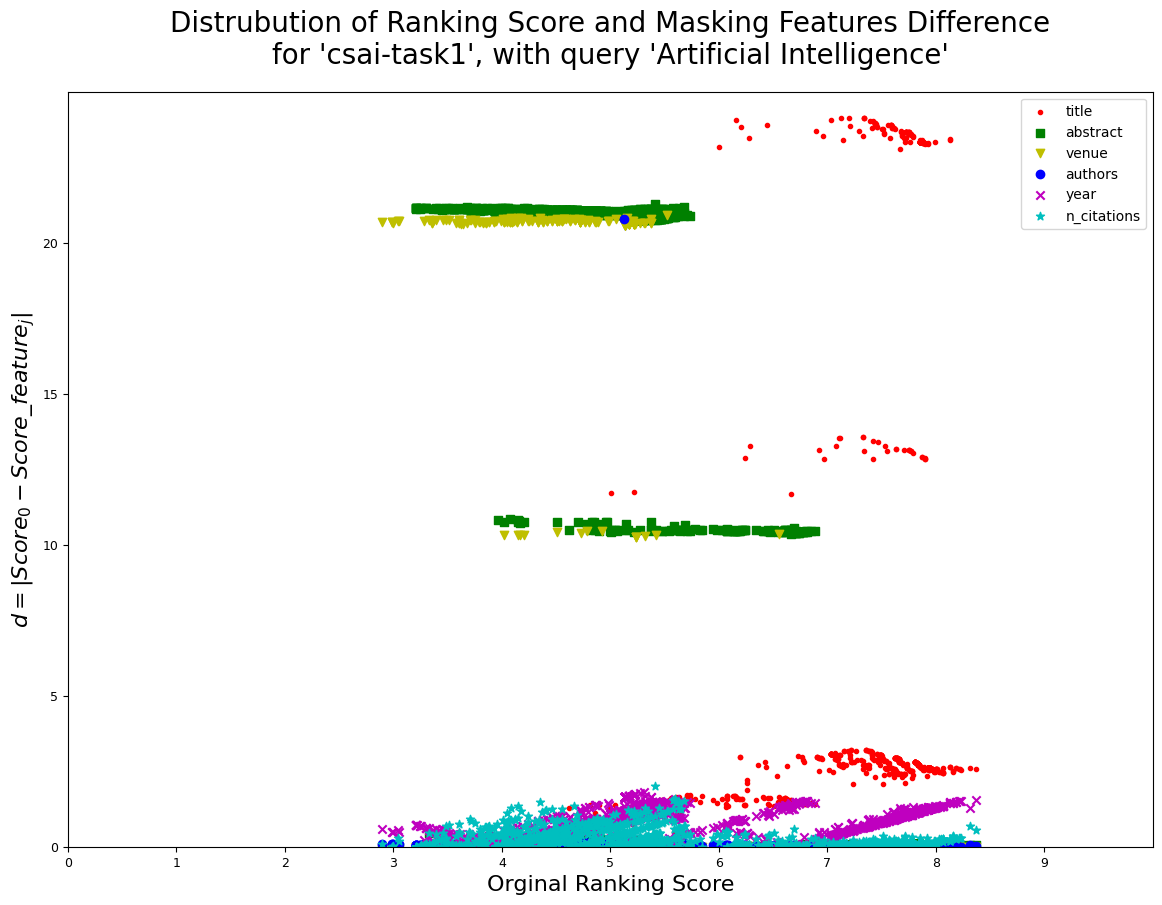

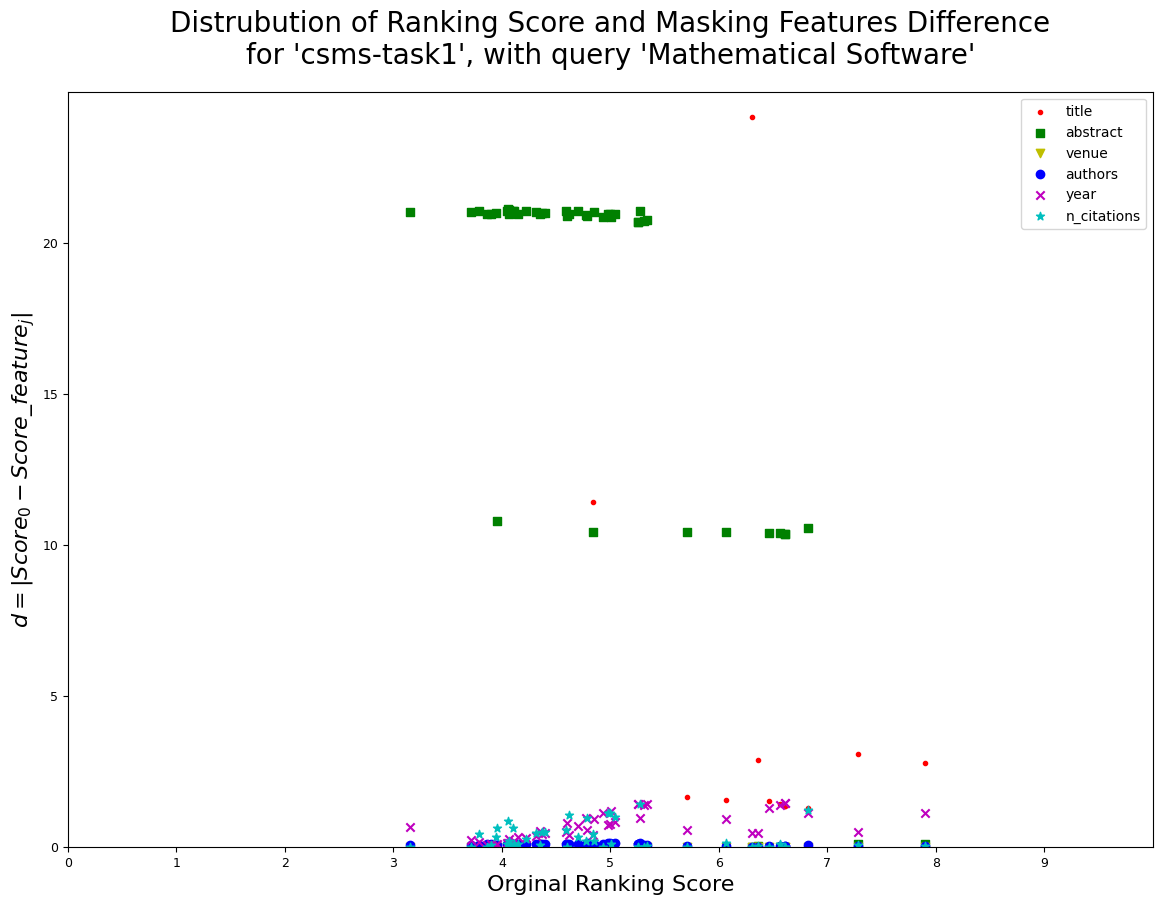

In [16]:
# ploting
print(f'Experiment {exp_name}\'s description: {description}')
def plot_scores_d(sample_name, d_features,sample_origin_npy, query, masking_option_keys): 
  plt.figure(figsize=(14, 10), dpi=100)
  i = 0
  for key in masking_option_keys:
    # print(masking_options[key])
    plt.scatter(
        sample_origin_npy,d_features[i],
        c=masking_options[key]['color'], 
        marker=masking_options[key]['marker'],
        label=masking_options[key]['plot_legend']
    )
    i += 1

  plt.xlabel('Orginal Ranking Score',fontsize=16)
  plt.ylabel('$ d = |Score_0 - Score\_feature_j|$', fontsize=16)
  plt.title(f'Distrubution of Ranking Score and Masking Features Difference\nfor \'{sample_name}\', with query \'{query}\'', fontsize=20, pad=20)
  x_max = 10
  x_min = 0
  x_pace = 1
  y_max = 25
  y_min = 0
  y_pace = 5
  plt.xticks(np.arange(x_min, x_max, x_pace), size = 9) 
  plt.yticks(np.arange(y_min, y_max, y_pace), size = 9)
  plt.ylim(y_min, y_max)
  plt.xlim(x_min, x_max)
  plt.legend(prop={'size': 10})
  plt.savefig(os.path.join(exp_dir, f'{sample_name}_positive_only.png'), facecolor='white', transparent=False)
  plt.show()

for sample_and_task in sample_and_data:
  sample_and_task_name = sample_and_task['sample_and_task_name']
  sample_origin_npy = sample_and_task['origin']
  d_features = sample_and_task['d_features']
  sample_query = sample_and_task['query']
  sample_masking_option_keys = sample_and_task['masking_option_keys']
  plot_scores_d(sample_and_task_name, d_features, sample_origin_npy, sample_query, sample_masking_option_keys)